In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

## 1)

In [2]:
X = np.array([
    [2,10],
    [2,5],
    [8,4],
    [5,8],
    [7,5],
    [6,4],
    [1,2],
    [4,9]
])

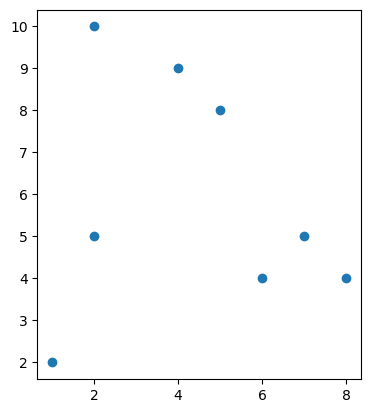

In [116]:
plt.scatter(X[:,0], X[:,1])
plt.gca().set_aspect('equal')

In [124]:
def kmeans(X, K, max_iter=10):
    m,n = X.shape

    centers = X[K,:]
    iter = 0
    while True:    
        iter+=1
        
        dist = cdist(centers, X)
        labels = [np.argmin(dist[:,i]) for i in range(m)]
        
        samples = [[] for _ in range(len(K))]
        for x_k, lbl in enumerate(labels):
            samples[lbl].append(X[x_k,:])
        samples = [np.stack(s) for s in samples]
        
        new_centers = [sample.mean(axis=0) for sample in samples]
 
        if (np.linalg.norm(np.stack(centers) - np.stack(new_centers)) < 1) or iter>= max_iter:
            break
        centers = new_centers.copy()

    return labels, iter, np.stack(centers)

In [125]:
labels, iter, centers = kmeans(X, [0,3,6])

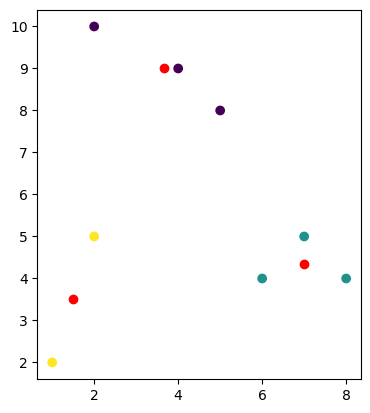

In [127]:
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], c='r')
plt.gca().set_aspect('equal')

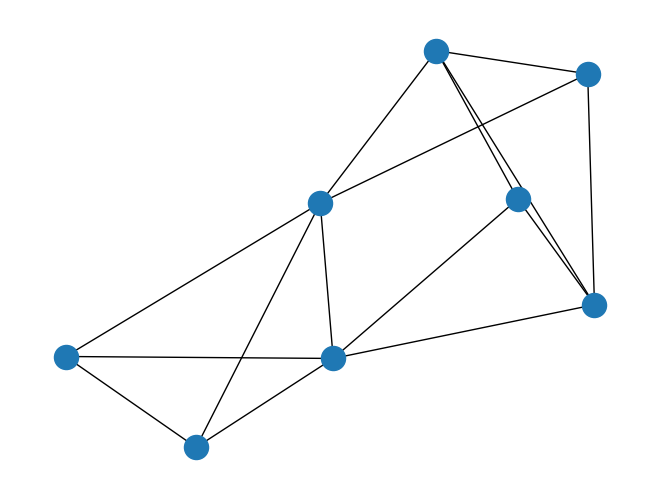

In [137]:
import networkx as nx
from sklearn.neighbors import kneighbors_graph

A = kneighbors_graph(X, 3, mode='distance')
g = nx.from_scipy_sparse_array(A)

nx.draw(g)

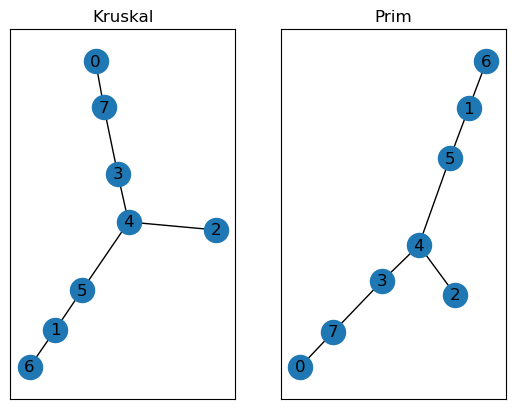

In [146]:
mst_g_kruskal = nx.minimum_spanning_tree(g)
mst_g_prim = nx.minimum_spanning_tree(g, algorithm='prim')

fig, axs = plt.subplots(1,2)
axs[0].set_title("Kruskal")
axs[1].set_title("Prim")
nx.draw_networkx(mst_g_kruskal, ax=axs[0])
nx.draw_networkx(mst_g_prim, ax=axs[1])

In [154]:
edges_kruskal = sorted(mst_g_kruskal.edges(data=True), key=lambda edge: edge[2].get('weight', 1))
edges_prim = sorted(mst_g_prim.edges(data=True), key=lambda edge: edge[2].get('weight', 1))

mst_g_kruskal.remove_edge(*edges_kruskal[-1][:2])
mst_g_prim.remove_edge(*edges_prim[-1][:2])

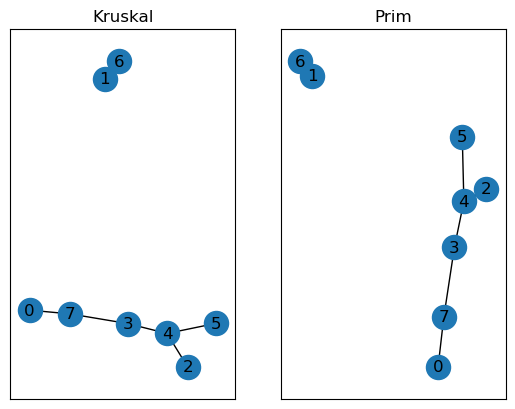

In [156]:
fig, axs = plt.subplots(1,2)
axs[0].set_title("Kruskal")
axs[1].set_title("Prim")
nx.draw_networkx(mst_g_kruskal, ax=axs[0])
nx.draw_networkx(mst_g_prim, ax=axs[1])